# Plain Logit and Nested Logit Models

In [15]:
import pyblp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
product_data = pd.read_csv(pyblp.data.NEVO_PRODUCTS_LOCATION)
product_data.head()

,market_ids,city_ids,quarter,product_ids,firm_ids,brand_ids,shares,prices,sugar,mushy,...,demand_instruments10,demand_instruments11,demand_instruments12,demand_instruments13,demand_instruments14,demand_instruments15,demand_instruments16,demand_instruments17,demand_instruments18,demand_instruments19
0,C01Q1,1,1,F1B04,1,4,0.012417,0.072088,2,1,...,2.116358,-0.154708,-0.005796,0.014538,0.126244,0.067345,0.068423,0.034800,0.126346,0.035484
1,C01Q1,1,1,F1B06,1,6,0.007809,0.114178,18,1,...,-7.374091,-0.576412,0.012991,0.076143,0.029736,0.087867,0.110501,0.087784,0.049872,0.072579
2,C01Q1,1,1,F1B07,1,7,0.012995,0.132391,4,1,...,2.187872,-0.207346,0.003509,0.091781,0.163773,0.111881,0.108226,0.086439,0.122347,0.101842
3,C01Q1,1,1,F1B09,1,9,0.005770,0.130344,3,0,...,2.704576,0.040748,-0.003724,0.094732,0.135274,0.088090,0.101767,0.101777,0.110741,0.104332
4,C01Q1,1,1,F1B11,1,11,0.017934,0.154823,12,0,...,1.261242,0.034836,-0.000568,0.102451,0.130640,0.084818,0.101075,0.125169,0.133464,0.121111


In [6]:
print(product_data.describe())

          city_ids      quarter     firm_ids    brand_ids       shares  \
count  2256.000000  2256.000000  2256.000000  2256.000000  2256.000000   
mean     32.340426     1.500000     2.125000    17.041667     0.019825   
std      17.674998     0.500111     1.268893    12.610594     0.025600   
min       1.000000     1.000000     1.000000     2.000000     0.000182   
25%      16.000000     1.000000     1.000000     7.750000     0.005183   
50%      33.000000     1.500000     2.000000    13.500000     0.011141   
75%      47.000000     2.000000     2.250000    20.750000     0.024646   
max      65.000000     2.000000     6.000000    48.000000     0.446883   

            prices        sugar        mushy  demand_instruments0  \
count  2256.000000  2256.000000  2256.000000          2256.000000   
mean      0.125740     8.625000     0.333333             0.025432   
std       0.029035     5.787851     0.471509             0.375534   
min       0.045487     0.000000     0.000000            -

## Exploratory Data Analysis

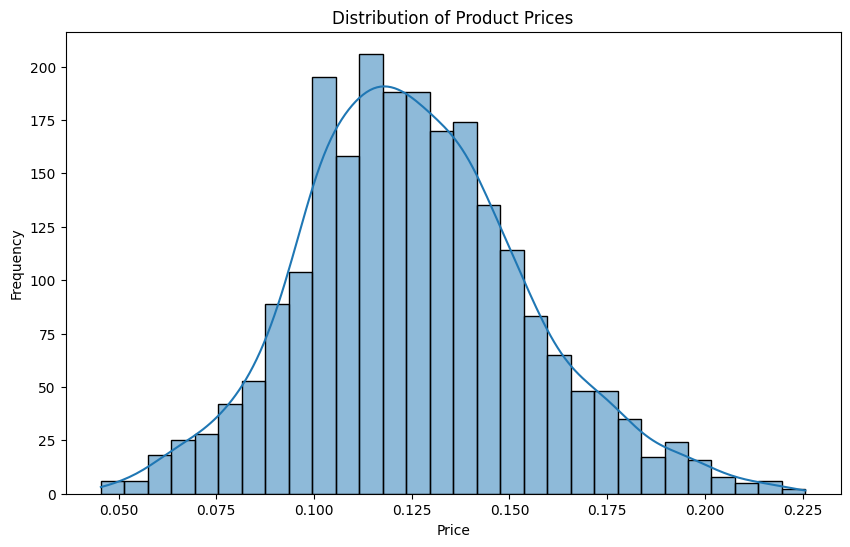

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(product_data['prices'], kde=True, bins=30)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

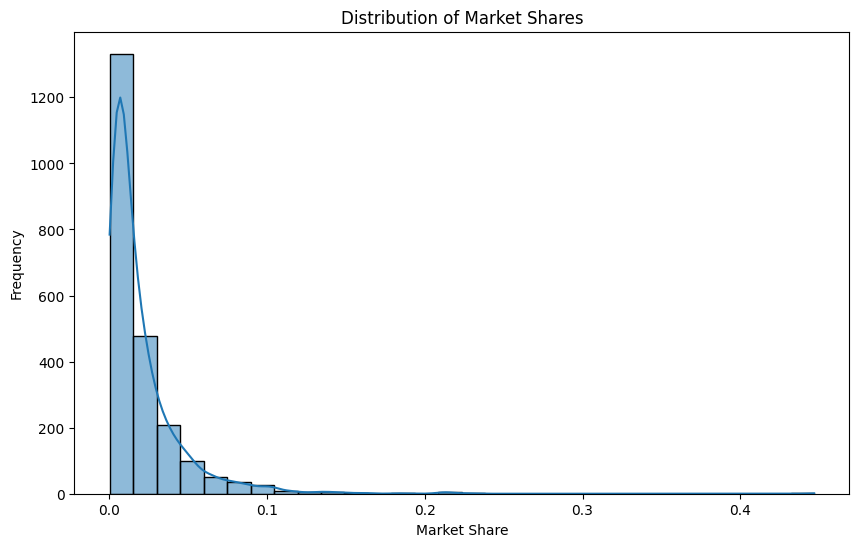

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(product_data['shares'], kde=True, bins=30)
plt.title('Distribution of Market Shares')
plt.xlabel('Market Share')
plt.ylabel('Frequency')
plt.show()


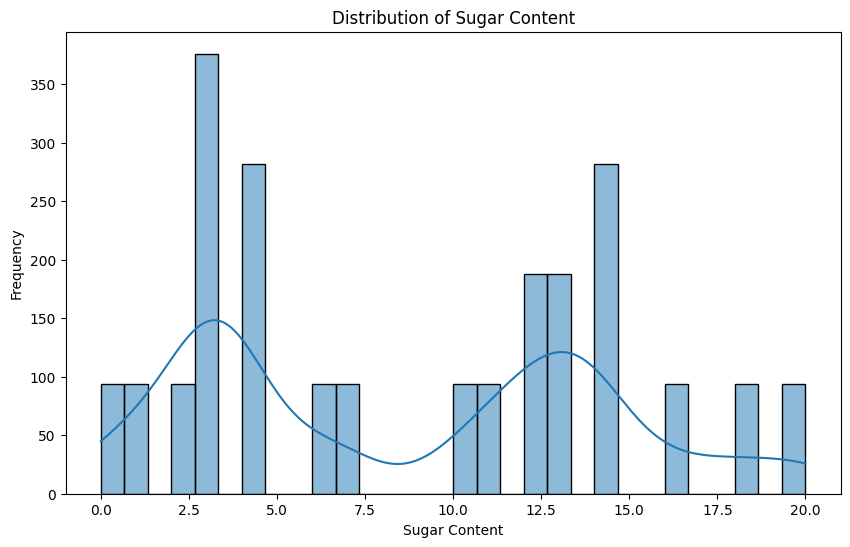

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(product_data['sugar'], kde=True, bins=30)
plt.title('Distribution of Sugar Content')
plt.xlabel('Sugar Content')
plt.ylabel('Frequency')
plt.show()


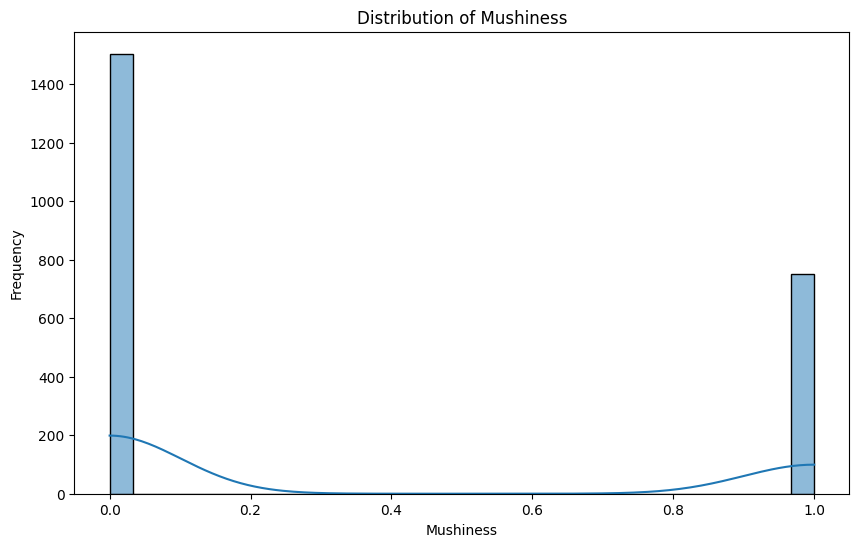

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(product_data['mushy'], kde=True, bins=30)
plt.title('Distribution of Mushiness')
plt.xlabel('Mushiness')
plt.ylabel('Frequency')
plt.show()


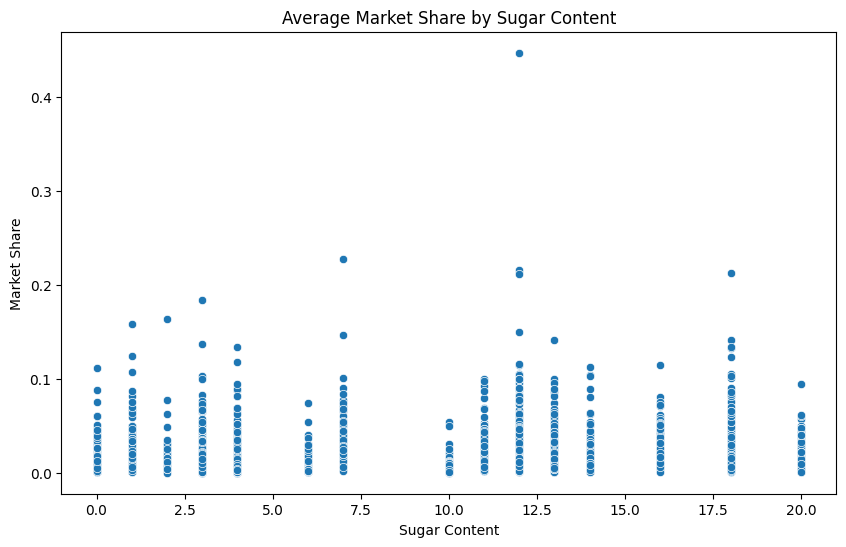

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sugar', y='shares', data=product_data)
plt.title('Average Market Share by Sugar Content')
plt.xlabel('Sugar Content')
plt.ylabel('Market Share')
plt.show()

/var/folders/9v/2yks1fb16lg9qcjs8j5412t40000gn/T/ipykernel_39284/2894609972.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='mushy', y='shares', data=product_data, ci=None)


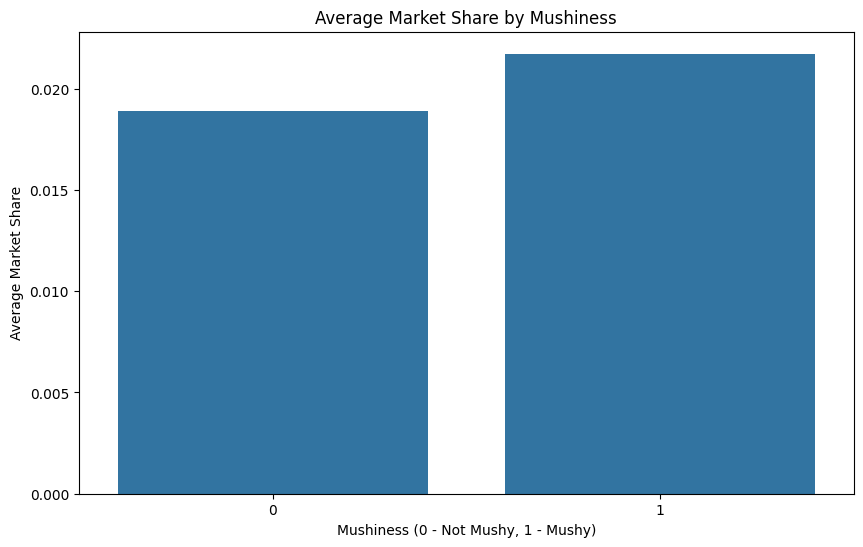

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='mushy', y='shares', data=product_data, ci=None)
plt.title('Average Market Share by Mushiness')
plt.xlabel('Mushiness (0 - Not Mushy, 1 - Mushy)')
plt.ylabel('Average Market Share')
plt.show()

/var/folders/9v/2yks1fb16lg9qcjs8j5412t40000gn/T/ipykernel_39284/3789199016.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='brand_ids', y='shares', data=product_data, jitter=True, palette='tab20')


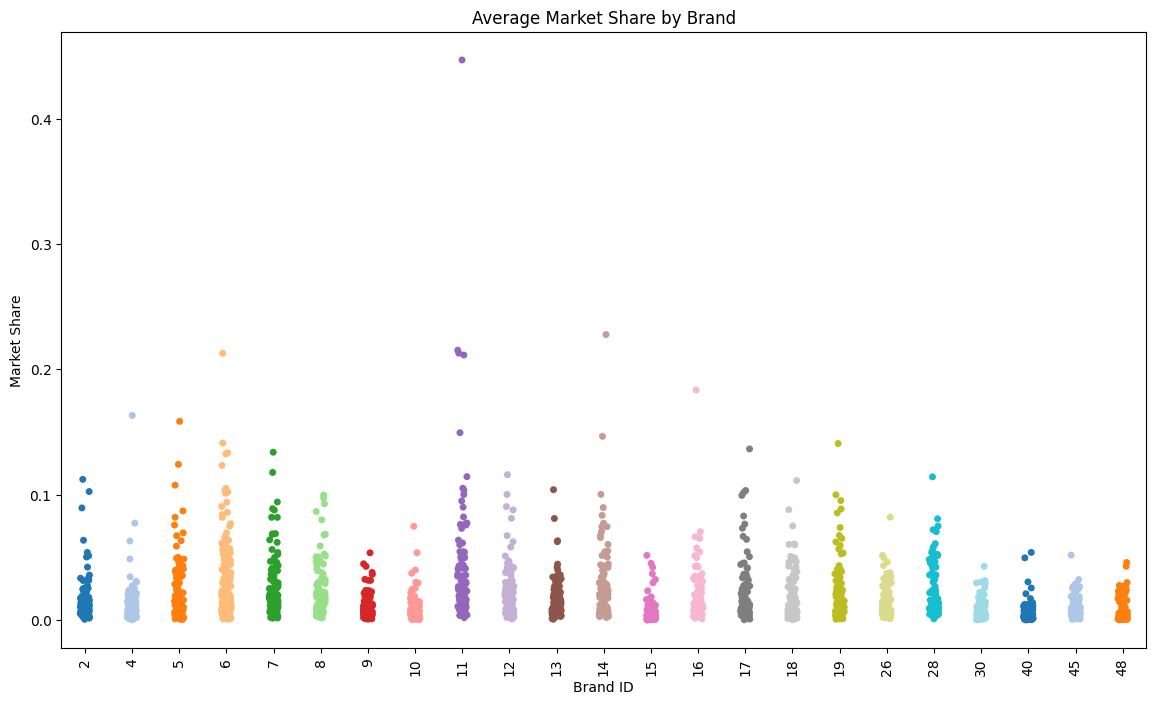

In [32]:
plt.figure(figsize=(14, 8))
sns.stripplot(x='brand_ids', y='shares', data=product_data, jitter=True, palette='tab20')
plt.title('Average Market Share by Brand')
plt.xlabel('Brand ID')
plt.ylabel('Market Share')
plt.xticks(rotation=90)
plt.show()

## Plain Logit

In [8]:
logit_formulation = pyblp.Formulation('prices', absorb='C(product_ids)')
logit_formulation

prices + Absorb[C(product_ids)]

In [9]:
problem = pyblp.Problem(logit_formulation, product_data)
problem

Dimensions:
 T    N     F    K1    MD    ED 
---  ----  ---  ----  ----  ----
94   2256   5    1     20    1  

Formulations:
     Column Indices:          0   
--------------------------  ------
X1: Linear Characteristics  prices

In [7]:
logit_results = problem.solve()
logit_results

Problem Results Summary:
GMM   Objective  Clipped  Weighting Matrix
Step    Value    Shares   Condition Number
----  ---------  -------  ----------------
 2    +1.9E+02      0         +5.7E+07    

Cumulative Statistics:
Computation   Objective 
   Time      Evaluations
-----------  -----------
 00:00:00         2     

Beta Estimates (Robust SEs in Parentheses):
  prices  
----------
 -3.0E+01 
(+1.0E+00)

## Nested Logit Models

### Creating an Additional Instrutment for the Nested Logit


In [23]:
def solve_nl(df):
    # Calculate the size of each group once
    group_sizes = df.groupby(['market_ids', 'nesting_ids'])['shares'].size()\
    .reset_index(name = 'demand_instruments20')
    # Merge the group sizes back into the original dataframe
    df = df.merge(group_sizes, on = ['market_ids', 'nesting_ids'], how = 'left')
    # Define the formulation for the nested logit model
    nl_formulation = pyblp.Formulation('0 + prices')
    # Create and solve the problem
    problem = pyblp.Problem(nl_formulation, df)
    results = problem.solve(rho=0.7)
    
    return results

### Single Nest Logit (Base) 

In [25]:
df_single = product_data.copy()
df_single['nesting_ids'] = 1
nl_single = solve_nl(df_single)
nl_single

Problem Results Summary:
GMM   Objective    Projected    Reduced   Clipped  Weighting Matrix  Covariance Matrix
Step    Value    Gradient Norm  Hessian   Shares   Condition Number  Condition Number 
----  ---------  -------------  --------  -------  ----------------  -----------------
 2    +2.0E+02     +5.1E-10     +1.1E+04     0         +2.0E+09          +3.0E+04     

Cumulative Statistics:
Computation  Optimizer  Optimization   Objective 
   Time      Converged   Iterations   Evaluations
-----------  ---------  ------------  -----------
 00:00:01       Yes          3             8     

Rho Estimates (Robust SEs in Parentheses):
All Groups
----------
 +9.8E-01 
(+1.4E-02)

Beta Estimates (Robust SEs in Parentheses):
  prices  
----------
 -1.2E+00 
(+4.0E-01)

### Two nests for mushy and non-mushy

In [26]:
mushy = product_data.copy()
mushy['nesting_ids'] = mushy['mushy']
nl_mushy = solve_nl(mushy)
nl_mushy

Problem Results Summary:
GMM   Objective    Projected    Reduced   Clipped  Weighting Matrix  Covariance Matrix
Step    Value    Gradient Norm  Hessian   Shares   Condition Number  Condition Number 
----  ---------  -------------  --------  -------  ----------------  -----------------
 2    +6.9E+02     +7.7E-10     +5.6E+03     0         +5.1E+08          +2.0E+04     

Cumulative Statistics:
Computation  Optimizer  Optimization   Objective 
   Time      Converged   Iterations   Evaluations
-----------  ---------  ------------  -----------
 00:00:01       Yes          3             8     

Rho Estimates (Robust SEs in Parentheses):
All Groups
----------
 +8.9E-01 
(+1.9E-02)

Beta Estimates (Robust SEs in Parentheses):
  prices  
----------
 -7.8E+00 
(+4.8E-01)

### Several nests for sugar levels

In [27]:
sugar = product_data.copy()
sugar['nesting_ids'] = sugar['sugar']
nl_sugar = solve_nl(sugar)
nl_sugar

Problem Results Summary:
GMM   Objective    Projected    Reduced   Clipped  Weighting Matrix  Covariance Matrix
Step    Value    Gradient Norm  Hessian   Shares   Condition Number  Condition Number 
----  ---------  -------------  --------  -------  ----------------  -----------------
 2    +5.1E+02     +7.7E-11     +1.8E+03     0         +8.3E+07          +3.2E+02     

Cumulative Statistics:
Computation  Optimizer  Optimization   Objective 
   Time      Converged   Iterations   Evaluations
-----------  ---------  ------------  -----------
 00:00:01       Yes          3             9     

Rho Estimates (Robust SEs in Parentheses):
All Groups
----------
 +3.9E-01 
(+3.3E-02)

Beta Estimates (Robust SEs in Parentheses):
  prices  
----------
 -2.7E+01 
(+3.3E-01)

In [30]:
nl_single.beta[0] / (1 - nl_single.rho)

array([[-67.39338888]])

In [31]:
nl_mushy.beta[0] / (1 - nl_mushy.rho)

array([[-72.27074638]])

In [32]:
nl_sugar.beta[0] / (1 - nl_sugar.rho)

array([[-44.83670826]])

### Interpretation of Nested Logit Model Results

#### 1. Single Nest

##### Summary
- **Objective Value**: +2.0E+02
- **Convergence**: Yes, after 3 iterations and 8 evaluations.
- **Rho Estimate**: +9.8E-01 (0.98) with a standard error of +1.4E-02 (0.014).
- **Beta Estimate (Prices)**: -1.2E+00 (-1.2) with a standard error of +4.0E-01 (0.4).


##### Interpretation
- **Rho**: The \($\rho\$) value of 0.98 indicates very high independence in the unobserved utility components within the nest, meaning choices among products are almost as independent as in a plain logit model.
- **Price Sensitivity**: The beta estimate for prices is -1.2, suggesting that as prices increase, the likelihood of choosing the product decreases. The sensitivity is significant but not extremely high.


#### 2. Mushiness (Binary: Non-Mushy or Mushy)

##### Summary
- **Objective Value**: +6.9E+02
- **Convergence**: Yes, after 3 iterations and 8 evaluations.
- **Rho Estimate**: +8.9E-01 (0.89) with a standard error of +1.9E-02 (0.019).
- **Beta Estimate (Prices)**: -7.8E+00 (-7.8) with a standard error of +4.8E-01 (0.48).


##### Interpretation
- **Rho**: The \(\rho\) value of 0.89 indicates a high level of independence among alternatives within the mushiness nest, though less so than in the single nest model.
- **Price Sensitivity**: The beta estimate for prices is -7.8, indicating a much higher sensitivity to price changes compared to the single nest model. This suggests that consumers are much more sensitive to price in the context of mushiness.


#### 3. Sugar Levels (1-20)

##### Summary
- **Objective Value**: +5.1E+02
- **Convergence**: Yes, after 3 iterations and 9 evaluations.
- **Rho Estimate**: +3.9E-01 (0.39) with a standard error of +3.3E-02 (0.033).
- **Beta Estimate (Prices)**: -2.7E+01 (-27) with a standard error of +3.3E-01 (0.33).


##### Interpretation
- **Rho**: The \$\rho\$) value of 0.39 indicates moderate correlation in the unobserved utility components within the sugar levels nest. This suggests that alternatives within this nest are perceived to be somewhat correlated but not entirely independent.
- **Price Sensitivity**: The beta estimate for prices is -27, indicating an extremely high sensitivity to price changes. This suggests that consumers are highly responsive to price variations when it comes to sugar levels.


### Practical Implications

1. **Single Nest**:
   - The high $\rho$ value suggests that the choices are almost independent, meaning that individual product attributes might be less crucial than in other models.
   - The adjusted price coefficient indicates significant sensitivity to price, but less so compared to other models.

2. **Mushiness**:
   - The high $\rho$ indicates a high level of independence within the mushiness nest, but not as independent as the single nest.
   - The very high sensitivity to price suggests that consumers place a lot of importance on mushiness when making purchasing decisions. Price reductions in less mushy products could significantly boost their attractiveness.

3. **Sugar Levels**:
   - The moderate $\rho$ value indicates some level of correlation within the sugar levels nest, meaning consumers see these products as somewhat related.
   - The extremely high sensitivity to price changes indicates that sugar level is a critical factor in consumer decision-making. Adjusting sugar levels (and corresponding prices) could be a powerful lever to influence consumer choices.